# Network of Subset of genes

07/15/2022

Clelia Corridori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from numpy import linalg as LA

## DATA

In [2]:
path = "C:/Users/cleli/OneDrive - Università degli Studi di Padova/LAVORO/GeneNetwork/"
file_name = "geni_IMP.xlsx"
df = pd.read_excel(path + file_name)
df

,EnsemblGeneID,Symbol,GM_2iL_2,GM_2iL_1,GM_24h_2iL_2,GM_24h_2iL_1,GM_36h_2iL_2,GM_36h_2iL_1,GM_48h_2iL_2,GM_48h_2iL_1,...,GM_36h_2i_1,GM_36h_2i_2,GM_48h_2i_1,GM_48h_2i_2,GM_60h_2i_1,GM_60h_2i_2,GM_72h_2i_1,GM_72h_2i_2,GM_84h_2i_1,GM_84h_2i_2
0,ENSMUSG00000003032,Klf4,721.246075,790.448527,362.034812,507.580169,338.426474,275.595044,109.118435,141.201368,...,15.825195,7.814844,19.079327,14.208553,38.803582,25.553683,17.314668,14.762640,31.121266,16.477378
1,ENSMUSG00000055148,Klf2,300.890974,288.413501,124.602767,102.125740,87.270395,86.229124,51.552016,27.900029,...,25.056559,32.040862,42.928486,27.909658,39.896640,34.467758,16.527638,14.762640,13.103691,5.703708
2,ENSMUSG00000021255,Esrrb,179.939742,201.400614,103.999160,83.834562,47.694286,52.413781,24.916808,11.228061,...,3.956299,3.125938,4.769832,1.522345,2.186117,4.159902,3.148121,1.845330,1.637961,3.168726
3,ENSMUSG00000026380,Tfcp2l1,797.584148,796.803401,135.395133,111.271328,69.511885,70.166836,22.339207,18.713434,...,7.912597,5.470391,6.359776,6.089380,7.104881,7.725532,4.722182,9.226650,12.284710,8.238689
4,ENSMUSG00000018604,Tbx3,212.656059,258.105641,129.508388,110.509196,19.788055,30.011117,6.873602,4.423175,...,0.659383,2.344453,2.384916,4.567035,10.384057,8.914075,8.657334,11.994645,12.284710,12.041160
5,ENSMUSG00000004040,Stat3,104.593073,110.477036,100.074664,74.688974,64.438024,70.589528,56.707218,26.879297,...,8.571981,8.596329,14.309495,9.641518,12.570174,10.696891,15.740607,16.607970,26.207382,15.209887
6,ENSMUSG00000055799,Tcf7l1,214.143165,222.420581,311.016356,241.595966,190.269757,213.882044,190.312861,154.130650,...,211.002599,154.733920,189.998299,163.905809,119.689921,153.322098,108.610191,119.946449,126.942008,114.074152
7,ENSMUSG00000012396,Nanog,172.999918,155.938825,66.716442,45.727943,31.965319,23.670740,10.740003,6.124397,...,5.934448,4.688907,10.334635,10.148967,34.977876,26.147955,22.823881,23.989290,11.465730,7.604943
8,ENSMUSG00000027547,Sall4,158.624566,155.449989,259.997900,187.484567,207.013495,222.758571,230.695273,224.561212,...,213.640131,202.404471,240.876504,231.396437,226.263139,209.183637,145.600618,144.858403,111.381375,116.609133
9,ENSMUSG00000024406,Pou5f1,72.372458,76.258485,62.791946,113.557725,111.117538,93.837576,76.039224,121.807446,...,60.663247,55.485396,54.058093,63.431041,43.175816,39.221932,18.101698,28.602615,16.379614,1.901236


In [3]:
col_names = np.array(df.columns)
# print(col_names)

col_names_2iL_1 = [col_names[3+2*i] for i in range(8)]
print(col_names_2iL_1)

col_names_2iL_2 = [col_names[2+2*i] for i in range(8)]
print(col_names_2iL_2)

col_names_2i_1 = [col_names[18+2*i] for i in range(8)]
print(col_names_2i_1)

col_names_2i_2 = [col_names[19+2*i] for i in range(8)]
print(col_names_2i_2)

['GM_2iL_1', 'GM_24h_2iL_1', 'GM_36h_2iL_1', 'GM_48h_2iL_1', 'GM_60h_2iL_1', 'GM_72h_2iL_1', 'GM_84h_2iL_1', 'GM_96h_2iL_1']
['GM_2iL_2', 'GM_24h_2iL_2', 'GM_36h_2iL_2', 'GM_48h_2iL_2', 'GM_60h_2iL_2', 'GM_72h_2iL_2', 'GM_84h_2iL_2', 'GM_96h_2iL_2']
['GM_2i_1', 'GM_12h_2i_1', 'GM_24h_2i_1', 'GM_36h_2i_1', 'GM_48h_2i_1', 'GM_60h_2i_1', 'GM_72h_2i_1', 'GM_84h_2i_1']
['GM_2i_2', 'GM_12h_2i_2', 'GM_24h_2i_2', 'GM_36h_2i_2', 'GM_48h_2i_2', 'GM_60h_2i_2', 'GM_72h_2i_2', 'GM_84h_2i_2']


In [4]:
df_2iL_1 = np.array(df.loc[:, col_names_2iL_1])
print("[# gene x # samples], set_1_2iL", df_2iL_1.shape)
df_2iL_2 = np.array(df.loc[:, col_names_2iL_2] )
print("[# gene x # samples], set_2_2iL", df_2iL_2.shape)
df_2iL = np.concatenate((df_2iL_1,df_2iL_2), 1)
print("[# gene x # samples], set_all_2iL", df_2iL.shape)

df_2i_1 = np.array(df.loc[:, col_names_2i_1])
print("[# gene x # samples], set_1_2i", df_2iL_1.shape)
df_2i_2 = np.array(df.loc[:, col_names_2i_2] )
print("[# gene x # samples], set_2_2i", df_2iL_2.shape)
df_2i = np.concatenate((df_2i_1,df_2i_2), 1)
print("[# gene x # samples], set_all_2i", df_2i.shape)

df_all = np.concatenate((df_2i, df_2iL), 1)
print("\n \n [# gene x # samples], set_all_data", df_all.shape)

[# gene x # samples], set_1_2iL (24, 8)
[# gene x # samples], set_2_2iL (24, 8)
[# gene x # samples], set_all_2iL (24, 16)
[# gene x # samples], set_1_2i (24, 8)
[# gene x # samples], set_2_2i (24, 8)
[# gene x # samples], set_all_2i (24, 16)

 
 [# gene x # samples], set_all_data (24, 32)


## PEARSON CORRELATION COEFFICIENTS

In [5]:
def Pearson_info(matx, det=False):
    corr_matx = np.corrcoef(matx)
    
    if det==True:
        determ = np.linalg.det(corr_matx)
        print("determinant: ", np.round(determ,4))
    
    return(corr_matx)

def fig_matx(matx, ax_names, titl):
    x_pos = np.arange(0,np.shape(matx)[0])
    
    plt.figure(figsize=(12,10))
    plt.imshow(matx)
    plt.xticks(x_pos, labels=ax_names, rotation='vertical')
    plt.yticks(x_pos, ax_names)
    plt.title(titl)
    plt.colorbar()
    
def fig_distribution(matx, titl):
    vect =  np.squeeze(np.reshape(matx, (np.shape(matx)[0]*np.shape(matx)[1],1)))
    
    plt.figure(figsize=(7,5))
    counts, bins, patches = plt.hist(vect, 30, range=(-1,1), density=True, color="Navy")
    plt.grid()
    plt.title(titl, fontsize=14)
    plt.xlabel("Pearson Correlation Coefficients", fontsize=14)
    plt.ylabel("Counts", fontsize=14)
    plt.show()
    
    centroids = (bins[1:] + bins[:-1]) / 2
    return(counts, bins, patches, centroids)
      
    


determinant:  0.0


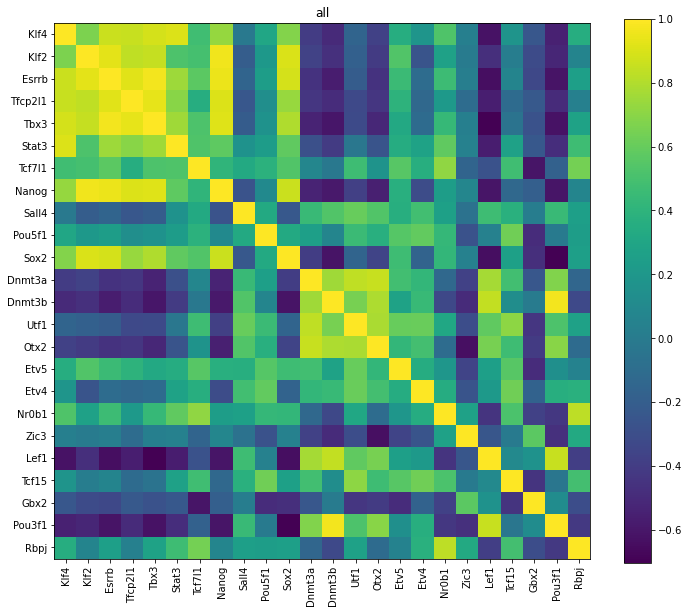

In [6]:
C_Mean = Pearson_info(df_all, det=True)

genes = np.array(df["Symbol"])
fig_matx(C_Mean, genes, "all")


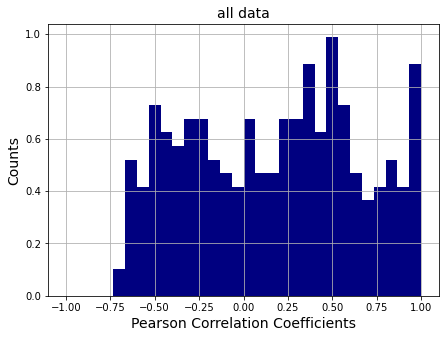

In [7]:
# distribution of correlation coefficient
counts, bins, patches, __ = fig_distribution(C_Mean, "all data")


## MATRICES OF THE INTERACTIONS 

### With Spectral Decomposition

In [8]:
def eigval_analysis(matx, thr = 0.01, info=True, fig=True):
    eigval, eigvect = np.linalg.eig(matx)
    if info==True:
        print("# eigvals below thr =",thr, ": ", np.shape(np.real(eigval[np.abs(eigval)<thr])))
        
    if fig==True: 
        plt.hist(np.real(np.abs(eigval)), 30, density=False, color="Navy")
        plt.grid()
        plt.title("2i+LIF", fontsize=14)
        plt.xlabel("Eigenvalues", fontsize=14)
        plt.ylabel("Counts", fontsize=14)
        plt.show()
    return(np.real(eigval), np.real(eigvect))

all data:
# eigvals below thr = 0.01 :  (5,)


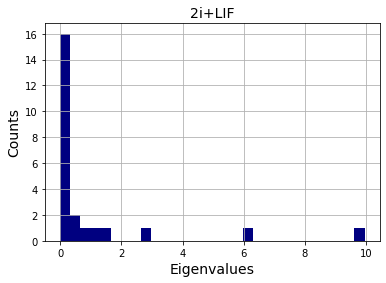

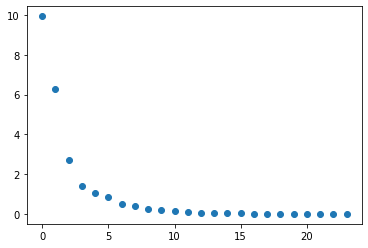

In [9]:
print("all data:")
eigval, eigvect = eigval_analysis(C_Mean)
plt.plot(eigval,'o')


In [10]:
def spectr_decomposition(eigval, eigvect, thr = 0.01, info=False):
    eigval_sel = eigval[np.abs(eigval)>=thr]
    matx_int = np.zeros((np.shape(eigvect)[0],np.shape(eigvect)[0]))
    
    for kk in range(len(eigval_sel)):
        for ii in range(np.shape(eigvect)[0]):
            for jj in range(np.shape(eigvect)[0]):
                matx_int[ii,jj] = eigval_sel[kk]**(-1) * eigvect[ii,kk] * eigvect[jj,kk]
            
    return(matx_int)

def fig_matx_int(matx, ax_names, titl, thr=2):
    x_pos = np.arange(0,np.shape(matx)[0])
    
    masked_array = np.ma.masked_where(np.abs(matx) <= thr, matx)
    
    cmap = matplotlib.cm.plasma  
    cmap.set_bad(color='white')
    
    plt.figure(figsize=(12,10))
    plt.imshow(masked_array, cmap=cmap)
    plt.xticks(x_pos, labels=ax_names, rotation='vertical')
    plt.yticks(x_pos, ax_names)
    plt.title(titl)
    plt.colorbar()
    plt.show()

In [11]:
def ind_val(matx, num=1, MM=True, names=True):
    vect_sorted = np.sort(np.squeeze(np.reshape(matx, (np.shape(matx)[0]*np.shape(matx)[1],1))))
    if MM==True:
        out = np.unique(vect_sorted)[0:num]
    if MM==False:
        out = np.unique(vect_sorted)[-num:]
        
    rows=[]
    cols=[]
    for ii in range(0, len(out)):
        rows.append(np.where(matx==out[ii])[0][0])
        cols.append(np.where(matx==out[ii])[1][0])
    
    genes_couples = []
    if names==True:
        for jj in range(0, len(rows)):
            genes_couples.append([rows[jj],cols[jj]])
        return(genes_couples)
    else:
        return(np.array(rows), np.array(cols))
    
def ind_val_abs(matx, num=1, names=True):
    vect_sorted = np.sort(np.abs(np.squeeze(np.reshape(matx, (np.shape(matx)[0]*np.shape(matx)[1],1)))))
    out = np.unique(vect_sorted)[0:num]
        
    rows=[]
    cols=[]
    for ii in range(0, len(out)):
        rows.append(np.where(np.abs(matx)==out[ii])[0][0])
        cols.append(np.where(np.abs(matx)==out[ii])[1][0])
    
    genes_couples = []
    if names==True:
        for jj in range(0, len(rows)):
            genes_couples.append([rows[jj],cols[jj]])
        return(genes_couples)
    else:
        return(np.array(rows), np.array(cols))

def gene_list(rows, cols, gene_names):
    genes = []
    for ii in range(0,len(rows)):
        genes.append([gene_names[rows[ii]], gene_names[cols[ii]]])
    return genes
    


<ipython-input-10-24f62889ab09>:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad(color='white')


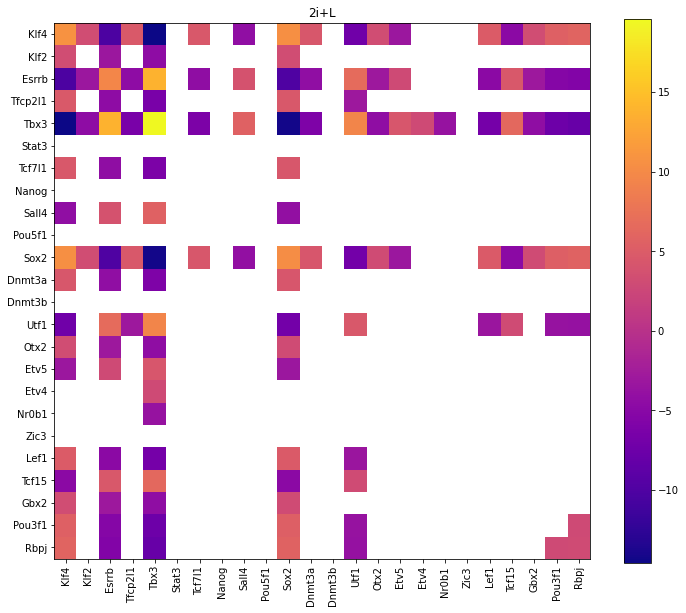

The ten strongest interactions: 
 [['Zic3', 'Zic3'], ['Dnmt3b', 'Zic3'], ['Zic3', 'Stat3'], ['Stat3', 'Zic3'], ['Zic3', 'Pou5f1'], ['Pou5f1', 'Zic3'], ['Nanog', 'Zic3'], ['Etv4', 'Zic3'], ['Nr0b1', 'Zic3'], ['Zic3', 'Etv5']]


In [14]:
Mint = spectr_decomposition(eigval, eigvect, thr = 0.01)


# figures
fig_matx_int(Mint, genes, "2i+L", thr=3)

# Info
rows, cols = ind_val_abs(Mint, 10, False)
gene_names = gene_list(rows, cols, genes)
print("The ten strongest interactions: \n", gene_names)



In [13]:
# # distribution of interaction coefficients
# int_vect_2iL = np.squeeze(np.reshape(Mint_2iL, (np.shape(Mint_2iL)[0]*np.shape(Mint_2iL)[1],1)))
# # int_vect_2i = np.squeeze(np.reshape(Interac_matx_2i, (np.shape(Interac_matx_2i)[0]*np.shape(Interac_matx_2i)[1],1)))

# plt.figure(figsize=(12,6))
# plt.hist(int_vect_2iL, 30, density=False, color="Navy")
# plt.grid()
# plt.title("2i+LIF", fontsize=14)
# plt.xlabel("Interaction Coefficients", fontsize=14)
# plt.ylabel("Counts", fontsize=14)
# thresh = 0.5
# plt.axvline(thresh, color="red", label="+"+np.str(thresh) )
# plt.axvline(-thresh, color="red", label="-"+np.str(thresh) )
# plt.legend(fontsize="14")
# # plt.xscale("log")


